# Numerical Methods in Accelerator Physics

### Demo lecture: phase-space tomography

<br />

##### Notebook lecture by [Dr. Adrian Oeftiger $\nearrow$](http://web-docs.gsi.de/~aoeftige)

at TU Darmstadt etit, Fachbereichsrats-Sitzung, on 27.09.2022.

Find this lecture [on github $\nearrow$](https://aoeftiger.github.io/TUDa-demo-lecture-tomo/) along with the [source github repo $\nearrow$](https://github.com/aoeftiger/TUDa-demo-lecture-tomo/).

<br />
<center>
    <small>(hit space to go to the next slide)</small>
</center>

# Tomographic Reconstruction

<b>"Tomography"</b>: imaging via sectioning

<b>Origins</b>: mathematician J. Radon (AUT)
- 1917: "On the determination of functions from their integrals along certain manifolds"
- inverse problem
- <b>Fourier slice theorem</b>: any 2D (3D) object can be reconstructed from infinite set of 1D (2D) projections

# Many applications

<div style="float:right; width:20%;">
    <a title="daveynin from United States, CC BY 2.0 &lt;https://creativecommons.org/licenses/by/2.0&gt;, via Wikimedia Commons" href="https://commons.wikimedia.org/wiki/File:UPMCEast_CTscan.jpg"><img src="https://upload.wikimedia.org/wikipedia/commons/thumb/2/27/UPMCEast_CTscan.jpg/800px-UPMCEast_CTscan.jpg" alt="CT scanner" style="width:100%;" /></a>
    <a title="Arielinson, CC BY-SA 4.0 &lt;https://creativecommons.org/licenses/by-sa/4.0&gt;, via Wikimedia Commons" href="https://commons.wikimedia.org/wiki/File:3d_CT_scan_animation.gif"><img src="https://upload.wikimedia.org/wikipedia/commons/6/68/3d_CT_scan_animation.gif" alt="Reconstructed CT scan" style="width:100%;" /></a>
    <img src="tomo.png" alt="Phase-space tomography at CERN PSB" style="width:100%;" />
<!--<a title="LucasVB, CC0, via Wikimedia Commons" href="https://commons.wikimedia.org/wiki/File:Radon_transform_sinogram.gif"><img alt="Radon transform sinogram" src="https://upload.wikimedia.org/wikipedia/commons/9/93/Radon_transform_sinogram.gif" style="width:100%;" /></a>-->
</div>

- medical: CT scan in hospitals (computed tomography)
    - 1979 Nobel price in Medicine: <br /> first CT scanner by Sir G.N. Hounsfield
- material science
- airport security
- accelerator physics
- ...

# Projection Integral or Radon Transform $\mathcal{R}_\theta(p)$

$$\require{color}
\mathcal{R}_\theta(p)\, f = \int dx\int dy~ f(x, y) \,\underbrace{\delta(x\,\cos \theta+y\,\sin\theta-p)}\limits_{\color{red}\text{projection slice}}$$

<img src="radon.png" alt="Radon transform" style="width:30%;margin:auto;" />

<p style="font-size: small; text-align: right;">image source: <a href="https://twitter.com/docmilanfar/status/1366229985975930881/photo/1">@docmilanfar, Twitter</a></p>

In [83]:
# imports
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from tqdm.notebook import tqdm

from skimage.transform import radon, iradon
from PIL import Image

Load sample image for the tomography:

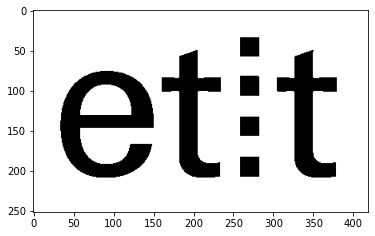

In [92]:
data = ~np.array(Image.open('etit_logo.png').convert('1', dither=False))

plt.imshow(data, cmap='binary')

Compute the Radon transform at an angle of 0 deg and 30 deg:

In [96]:
Rf_0 = radon(data, [0], circle=False).astype(float)
Rf_90 = radon(data, [90], circle=False).astype(float)

Text(0, 0.5, '$\\mathcal{R}_{\\theta}(p)f$')

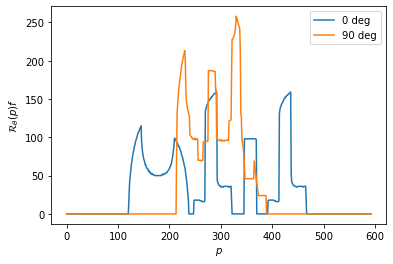

In [97]:
plt.plot(Rf_0, label='0 deg')
plt.plot(Rf_90, label='90 deg')
plt.legend()
plt.xlabel('$p$')
plt.ylabel(r'$\mathcal{R}_{\theta}(p)f$')

# Reconstruction Principle

<img src="iter1.gif" alt="projection" style="width:20%;float:left;margin-right:5%;margin-left:2.5%;margin-bottom:1em;" />
<img src="iter2.gif" alt="back-projection" style="width:20%;float:left;margin-right:5%;margin-bottom:1em;" />

<div style="clear:both;"></div>

projection (measurement) $\implies$ back-projection (reconstruction) 

(Require $ N_{meas} \gtrsim \pi\cdot\frac{\text{total diameter}}{\text{pixel size}}$)

# Reconstruction Principle

<img src="iter1.gif" alt="projection" style="width:20%;float:left;margin-right:5%;margin-left:2.5%;margin-bottom:1em;" />
<img src="iter2.gif" alt="back-projection" style="width:20%;float:left;margin-right:5%;margin-bottom:1em;" />
<img src="iter3.gif" alt="back-projection" style="width:20%;float:left;margin-right:5%;margin-bottom:1em;" />
<img src="iter4.gif" alt="back-projection" style="width:20%;float:left;margin-bottom:1em;" />

<div style="clear:both;"></div>

projection (measurement) $\implies$ back-projection (reconstruction) 

$\stackrel{\text{improve}}{\implies}$ re-projection (red) $\implies$ iteratively reduce discrepancy

# Reconstruction Algorithms

<div style="float:right;width:30%;">
<a title="Biomedizinische NMR Forschungs GmbH, CC BY-SA 3.0 &lt;https://creativecommons.org/licenses/by-sa/3.0&gt;, via Wikimedia Commons" href="https://commons.wikimedia.org/wiki/File:Heart-direct-vs-iterative-reconstruction.png"><img src="https://upload.wikimedia.org/wikipedia/commons/5/54/Heart-direct-vs-iterative-reconstruction.png" alt="direct vs. iterative reconstruction" style="width:100%;" /></a>
</div>

<b>Filtered Back-Projection (FBP)</b> vs. <b>Iterative</b> Reconstruction

$\implies$ Iterative <b>algebraic reconstruction technique (ART)</b>:
- more computationally expensive than FBP
- more accurate, less artifacts
- can incorporate <i>a priori</i> knowledge

$$ \sum\limits_j A_{ij} x_j = b_i $$

$$ x^{k+1} = x^k + \frac{b_i - a_i\cdot x^k}{|a_i|^2} a_i^T $$

In [99]:
# parameters
N = max(data.shape)
ANG = 180
VIEW = 180
THETA = np.linspace(0, ANG, VIEW, endpoint=False)

In [100]:
# definitions of matrix transforms
A = lambda x: radon(x, THETA, circle=False).astype(float)
AT = lambda y: iradon(y, THETA, circle=False, filter_name=None, 
                      output_size=N).astype(float) * 2 * len(THETA) / np.pi
AINV = lambda y: iradon(y, THETA, circle=False, output_size=N).astype(float)

In [101]:
proj = A(data)

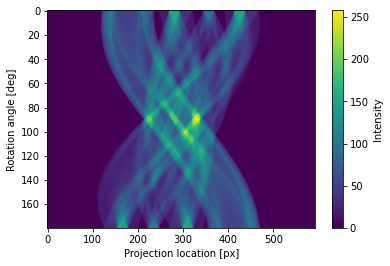

In [102]:
plt.imshow(proj.T)

plt.gca().set_aspect('auto')
plt.xlabel('Projection location [px]')
plt.ylabel('Rotation angle [deg]')
plt.colorbar(label='Intensity')

In [103]:
fbp = AINV(proj)

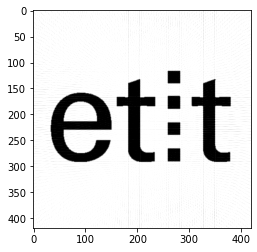

In [104]:
plt.imshow(fbp, cmap='binary', vmin=0, vmax=1)

In [105]:
noise = np.random.normal(0, 0.2 * np.max(proj), size=proj.shape)

In [106]:
proj_noise = proj + noise

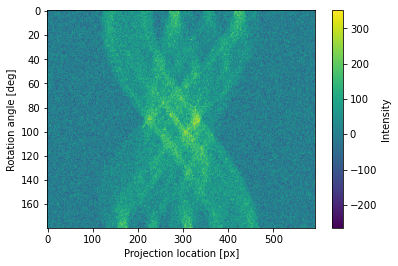

In [107]:
plt.imshow(proj_noise.T)
plt.gca().set_aspect('auto')
plt.xlabel('Projection location [px]')
plt.ylabel('Rotation angle [deg]')
plt.colorbar(label='Intensity')

In [108]:
fbp_noise = AINV(proj_noise)

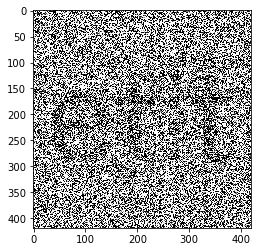

In [116]:
plt.imshow(fbp_noise, cmap='binary', vmin=0, vmax=1, interpolation='None')

In [110]:
def ART(A, AT, b, x, mu=1e0, niter=1e2, bpos=True):

    ATA = AT(A(np.ones_like(x)))

    for i in tqdm(range(int(niter))):

        x = x + np.divide(mu * AT(b - A(x)), ATA)

        if bpos:
            x[x < 0] = 0

        plt.imshow(x, cmap='binary', vmin=0, vmax=1, interpolation='None')
        plt.title("%d / %d" % (i + 1, niter))
        plt.show()

    return x

## Algebraic Reconstruction Technique (ART) INITIALISATION
x0 = np.zeros((N, N))
mu = 1e0
niter = 20 #2e2
bpos = True

  0%|          | 0/20 [00:00<?, ?it/s]

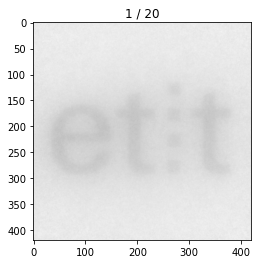

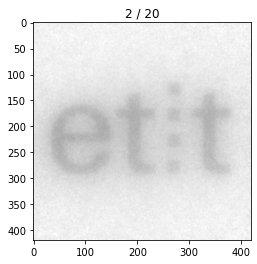

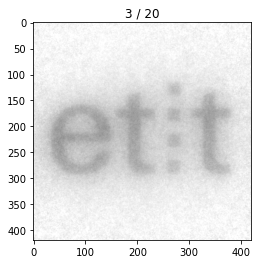

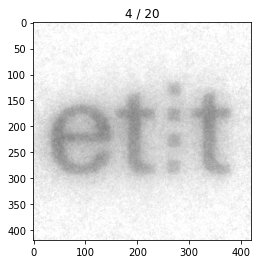

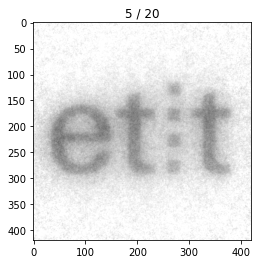

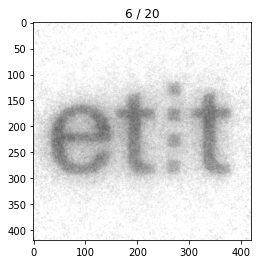

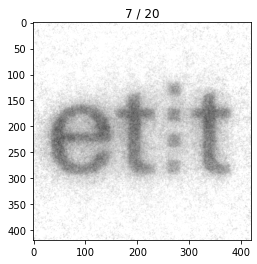

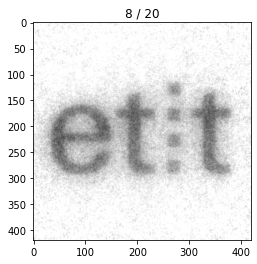

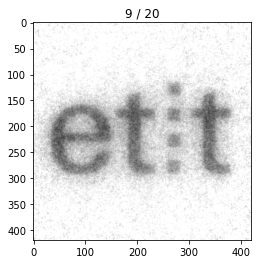

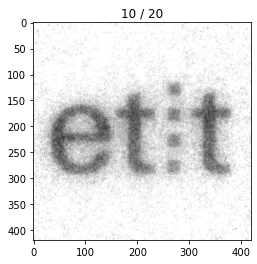

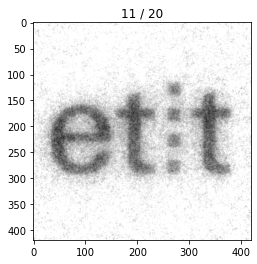

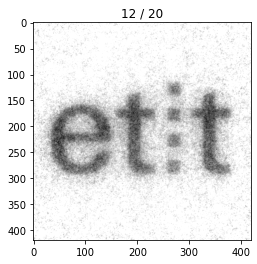

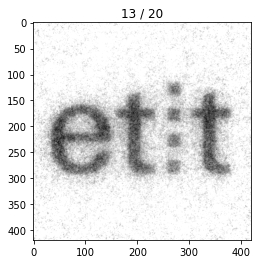

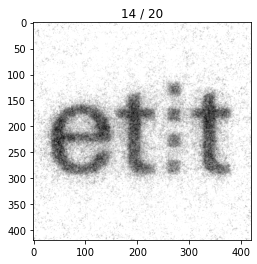

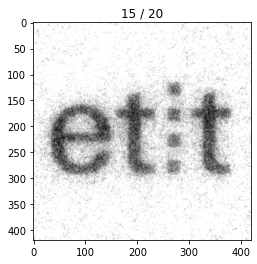

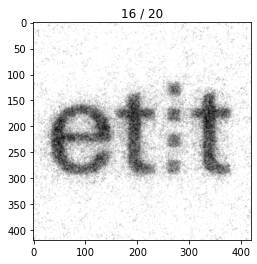

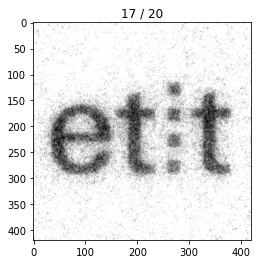

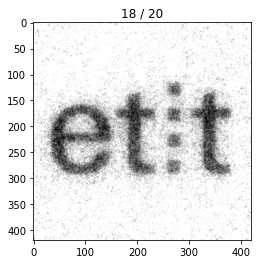

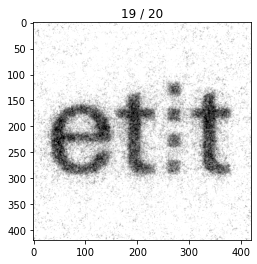

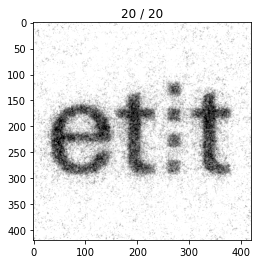

In [111]:
x_art = ART(A, AT, proj_noise, x0, mu, niter, bpos)

Text(0.5, 1.0, 'ART')

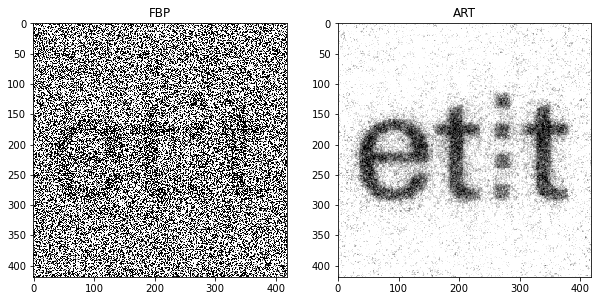

In [115]:
_, ax = plt.subplots(1, 2, figsize=(10, 5))

plt.sca(ax[0])
plt.imshow(fbp_noise, cmap='binary', vmin=0, vmax=1, interpolation='None')
plt.title('FBP')

plt.sca(ax[1])
plt.imshow(x_art, cmap='binary', vmin=0, vmax=1, interpolation='None')
plt.title('ART')

# Thank you

# Wall Current Monitor

<span style='color:#0C0;'>Beam</span> traverses gap with <span style='color:red;'>resistors</span> in vacuum tube, <span style='color:#CC0;'>induced mirror current</span> builds up voltage:

$$ V_{gap} = R_{gap} \cdot I_{beam}$$

<img src="wcm.png" alt="wall current monitor principle" style="width:50%;margin:auto;" />

<p style="font-size: small; text-align: right;">image source: <a href="https://uspas.fnal.gov/materials/09UNM/BeamCurrentMonitors.pdf">USPAS09</a> (W. Blokland, U. Raich)</p>